# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)
print(project_data.shape)

(109248, 17)


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [7]:
#adding price of project to the project_data dataset
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)
print(price_data.shape)
print(price_data.columns.values)


(260115, 3)
['id' 'price' 'quantity']


In [8]:
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [9]:
project_data.shape

(109248, 19)

## 1.2 preprocessing of `project_subject_categories`

In [10]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [11]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [12]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [13]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [14]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [15]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [16]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [18]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [19]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [20]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [21]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:18<00:00, 1385.92it/s]


In [22]:
# after preprocesing
preprocessed_essays[20000]

'a person person no matter small dr seuss i teach smallest students biggest enthusiasm learning my students learn many different ways using senses multiple intelligences i use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans our school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered having social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition my students love role play pretend kitchen early childhood classroom i several kids ask can try cooking real food i take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time my students grounded appreciation work went making food knowledge ingre

In [23]:
project_data['clean_essay'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                         clean_essay  
0  i fortunate enough use fairy tale stem kits cl...  
1  imagine 8 9 years old you third grade classroo...

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [24]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_title= []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent.lower().strip())
    
    

100%|██████████| 109248/109248 [00:03<00:00, 31298.61it/s]


In [25]:
project_data['clean_title'] = preprocessed_title
project_data.drop(['project_title'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                         clean_essay  \
0  i fortunate enough use fairy tale stem kits cl...   
1  imagine 8 9 years old you third grade classroo...   

                           clean_title  
0  engineering steam primary classroom  
1                  sensory tools focus

In [26]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_grade = []
# tqdm is for printing the status bar
for sent in tqdm(project_data['project_grade_category'].values):
    sent = sent.replace('-', '_')
    sent = sent.replace(' ', '_')
    
    
    preprocessed_grade.append(sent)
    
    

100%|██████████| 109248/109248 [00:00<00:00, 833541.30it/s]


In [27]:
project_data['clean_grades'] = preprocessed_grade
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date  \
0           CA 2016-04-27 00:27:36   
1           UT 2016-04-27 00:31:25   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                         clean_essay  \
0  i fortunate enough use fairy tale stem kits cl...   
1  imagine 8 9 years old you third grade classroo...   

                           clean_title   clean_grades  
0  engineering steam primary classroom  Grades_PreK_2  
1                  sensory tools focus     Grades_3_5

In [28]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [29]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/namitagarwal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
#citation: https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzer

sentiments=[]
sid = SentimentIntensityAnalyzer()

for essay in project_data['clean_essay']:
    sentiment = sid.polarity_scores(essay)
        
    for k in sorted(sentiment):
        sentiments.append([sentiment['neg'], sentiment['pos'],
                           sentiment['neu'], sentiment['compound']])

In [31]:
#adding all the four sentiment scores to our dataframe
project_data[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)

In [32]:
#finding #words in title
count=0
count_lst_title=[]
for word in preprocessed_title:
    count+=1
    count_lst_title.append(count)

project_data[['#words_in_title']] = pd.DataFrame(count_lst_title)

In [33]:
#finding #words in essay
count=0
count_lst_essay=[]
for word in preprocessed_essays:
    count+=1
    count_lst_essay.append(count)

project_data[['#words_in_essay']] = pd.DataFrame(count_lst_essay)

In [34]:
project_data.shape

(109248, 26)

## 1.5 Preparing data for models

In [35]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'clean_essay', 'clean_title', 'clean_grades', 'neg', 'pos', 'neu',
       'compound', '#words_in_title', '#words_in_essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [767]:
 #setting the order of the columns 
project_data= project_data[['id','teacher_id','teacher_prefix','school_state','Date','clean_grades','clean_categories','clean_subcategories','clean_title','project_essay_1','project_essay_2','project_essay_3','project_essay_4','project_resource_summary','teacher_number_of_previously_posted_projects','price','quantity','clean_essay','neg', 'pos', 'neu', 'compound', '#words_in_title',
       '#words_in_essay','project_is_approved']]

project_data.shape

(109248, 25)

In [768]:
#splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)
# considering 50k points due to memory issues

Y=np.array(project_data.iloc[:50000, 24])#.reshape(-1,1) #stores 'project is approved' column
X=project_data.iloc[:50000, 0:24] 


In [769]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [770]:
#splitting dataset(70-30) into 2 parts - 'part1' and test set. 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3,  random_state = 0,stratify =Y)

In [771]:
print(x_train.shape) #we'll train our models using x_train
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(35000, 24)
(35000,)
(15000, 24)
(15000,)


In [772]:
#y is added now so that we can do the response coding for the categorical features

x_train['project_approval'] = y_train

In [773]:
x_train.head(2)

id                        teacher_id teacher_prefix school_state  \
280    p044577  ad751822d1d4c3ade89374401a1cdd2f           Mrs.           KY   
49209  p113113  fb55c68c599fc2893cfcb31d63af34fd           Mrs.           NY   

                     Date clean_grades                clean_categories  \
280   2016-04-28 07:08:49   Grades_3_5  Literacy_Language Math_Science   
49209 2016-09-16 13:55:53   Grades_6_8    AppliedLearning SpecialNeeds   

                   clean_subcategories  \
280     Literature_Writing Mathematics   
49209  CharacterEducation SpecialNeeds   

                                   clean_title  \
280      technology classroom ipads much games   
49209  rewarding recognizing positive behavior   

                                         project_essay_1  ...    price  \
280    My students are falling behind in a world that...  ...  2234.85   
49209  School is a home away from home for my student...  ...   101.89   

      quantity                                        clean_essay    neg  \
280          1  my students falling behind world revolves arou...  0.000   
49209        8  school home away home students many eight morn...  0.019   

         pos    neu  compound #words_in_title  #words_in_essay  \
280    0.136  0.864    0.9694             281              281   
49209  0.443  0.539    0.9964           49210            49210   

       project_approval  
280                   1  
49209                 0  

[2 rows x 25 columns]

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [774]:
#teacher_prefix
x_train['teacher_prefix']=x_train['teacher_prefix'].fillna('Ms.')
x_test['teacher_prefix']=x_test['teacher_prefix'].fillna('Ms.').dropna()

In [704]:
techerprefix= x_train['teacher_prefix'].dropna().unique().tolist()    #list of features in this category
techerprefix

['Mrs.', 'Ms.', 'Mr.', 'Teacher', 'Dr.']

In [705]:
main_list=[]

for prefix in techerprefix:
    
    a = x_train[x_train['teacher_prefix'] == prefix ]
    #print(a.shape) #12975 total projects

    approved = a[a['project_approval'] == 1]
    num_of_approved = approved.shape

    rejected = a[a['project_approval'] == 0]
    num_of_rejected = rejected.shape
    
    p1 = num_of_rejected[0]/ (num_of_approved[0] +num_of_rejected[0])  #prob for rejected
    p2 = num_of_approved[0]/ (num_of_approved[0] +num_of_rejected[0])  #prob for accepted

    lst = [round(p1,2),round(p2,2)] #we've to replace the prefixes with these values
    #print(lst)
    
    main_list.append(lst)
    #print(p2)
print(main_list)
print(techerprefix)

[[0.15, 0.85], [0.17, 0.83], [0.17, 0.83], [0.22, 0.78], [0.33, 0.67]]
['Mrs.', 'Ms.', 'Mr.', 'Teacher', 'Dr.']


In [706]:
di = dict(zip(techerprefix,main_list))
di

{'Mrs.': [0.15, 0.85],
 'Ms.': [0.17, 0.83],
 'Mr.': [0.17, 0.83],
 'Teacher': [0.22, 0.78],
 'Dr.': [0.33, 0.67]}

In [707]:
teacher_prefix_transformed_train= x_train['teacher_prefix'].map(di)#.as_matrix()[:,np.newaxis]
teacher_prefix_transformed_test= x_test['teacher_prefix'].map(di)#.as_matrix()[:,np.newaxis]

In [708]:
print(teacher_prefix_transformed_train.shape)
print(teacher_prefix_transformed_test.shape)

(35000,)
(15000,)


In [709]:
teacher_prefix_transformed_test

26148    [0.17, 0.83]
11721    [0.15, 0.85]
34046    [0.15, 0.85]
27853    [0.17, 0.83]
27082    [0.17, 0.83]
             ...     
21496    [0.17, 0.83]
1224     [0.15, 0.85]
48424    [0.15, 0.85]
20611    [0.15, 0.85]
44343    [0.17, 0.83]
Name: teacher_prefix, Length: 15000, dtype: object

In [710]:
teacher_rej_train=[ ]
teacher_app_train=[]

for i in range(len(teacher_prefix_transformed_train)):
  #print(i)
  #print(teacher_prefix_transformed_train.values[i])
    teacher_rej_train.append(teacher_prefix_transformed_train.values[i][0])
    teacher_app_train.append(teacher_prefix_transformed_train.values[i][1])
 


teacher_rej_train = np.array(teacher_rej_train)[:,np.newaxis]
teacher_app_train = np.array(teacher_app_train)[:,np.newaxis]
print(teacher_rej_train.shape)
print(teacher_app_train.shape)

(35000, 1)
(35000, 1)


In [711]:
teacher_rej_test=[ ]
teacher_app_test=[]

for i in range(len(teacher_prefix_transformed_test)):
  #print(i)
  #print(teacher_prefix_transformed_train.values[i])
    teacher_rej_test.append(teacher_prefix_transformed_test.values[i][0])
    teacher_app_test.append(teacher_prefix_transformed_test.values[i][1])
    
teacher_rej_test = np.array(teacher_rej_test)[:,np.newaxis]
teacher_app_test = np.array(teacher_app_test)[:,np.newaxis]
print(teacher_rej_test.shape)
print(teacher_app_test.shape)

(15000, 1)
(15000, 1)


In [712]:
#project grade

In [713]:
cleangrades= x_train['clean_grades'].dropna().unique().tolist()    #list of features in this category
cleangrades

['Grades_3_5', 'Grades_6_8', 'Grades_PreK_2', 'Grades_9_12']

In [714]:
main_list=[]

for grade in cleangrades:
    
    a = x_train[x_train['clean_grades'] == grade ]
    #print(a.shape) #12975 total projects

    approved = a[a['project_approval'] == 1]
    num_of_approved = approved.shape

    rejected = a[a['project_approval'] == 0]
    num_of_rejected = rejected.shape
    
    p1 = num_of_rejected[0]/ (num_of_approved[0] +num_of_rejected[0])  #prob for rejected
    p2 = num_of_approved[0]/ (num_of_approved[0] +num_of_rejected[0])  #prob for accepted

    lst = [round(p1,2),round(p2,2)] #we've to replace the prefixes with these values
    #print(lst)
    
    main_list.append(lst)
    #print(p2)
print(main_list)
print(cleangrades)

[[0.15, 0.85], [0.17, 0.83], [0.16, 0.84], [0.16, 0.84]]
['Grades_3_5', 'Grades_6_8', 'Grades_PreK_2', 'Grades_9_12']


In [715]:
di = dict(zip(cleangrades,main_list))
di

{'Grades_3_5': [0.15, 0.85],
 'Grades_6_8': [0.17, 0.83],
 'Grades_PreK_2': [0.16, 0.84],
 'Grades_9_12': [0.16, 0.84]}

In [716]:
clean_grades_transformed_train= x_train['clean_grades'].map(di)#.as_matrix()[:,np.newaxis]
clean_grades_transformed_test= x_test['clean_grades'].map(di)#.as_matrix()[:,np.newaxis]

In [717]:
print(clean_grades_transformed_train.shape)
print(clean_grades_transformed_test.shape)

(35000,)
(15000,)


In [718]:
grades_rej_train=[ ]
grades_app_train=[]

for i in range(len(clean_grades_transformed_train)):
  #print(i)
  #print(teacher_prefix_transformed_train.values[i])
    grades_rej_train.append(clean_grades_transformed_train.values[i][0])
    grades_app_train.append(clean_grades_transformed_train.values[i][1])
    
grades_rej_train = np.array(grades_rej_train)[:,np.newaxis]
grades_app_train = np.array(grades_app_train)[:,np.newaxis]
print(grades_rej_train.shape)
print(grades_app_train.shape)

(35000, 1)
(35000, 1)


In [719]:
grades_rej_test=[ ]
grades_app_test=[]

for i in range(len(clean_grades_transformed_test)):
  #print(i)
  #print(teacher_prefix_transformed_train.values[i])
    grades_rej_test.append(clean_grades_transformed_test.values[i][0])
    grades_app_test.append(clean_grades_transformed_test.values[i][1])
    
grades_rej_test = np.array(grades_rej_test)[:,np.newaxis]
grades_app_test = np.array(grades_app_test)[:,np.newaxis]
print(grades_rej_test.shape)
print(grades_app_test.shape)

(15000, 1)
(15000, 1)


In [720]:
#school state

In [721]:
schoolstate= x_train['school_state'].dropna().unique().tolist()    #list of features in this category
#schoolstate

In [722]:
main_list=[]

for state in schoolstate:
    
    a = x_train[x_train['school_state'] == state ]
    #print(a.shape) #12975 total projects

    approved = a[a['project_approval'] == 1]
    num_of_approved = approved.shape

    rejected = a[a['project_approval'] == 0]
    num_of_rejected = rejected.shape
    
    p1 = num_of_rejected[0]/ (num_of_approved[0] +num_of_rejected[0])  #prob for rejected
    p2 = num_of_approved[0]/ (num_of_approved[0] +num_of_rejected[0])  #prob for accepted

    lst = [round(p1,2),round(p2,2)] #we've to replace the prefixes with these values
    #print(lst)
    
    main_list.append(lst)
    #print(p2)
print(main_list)
print(schoolstate)

[[0.14, 0.86], [0.14, 0.86], [0.2, 0.8], [0.14, 0.86], [0.17, 0.83], [0.16, 0.84], [0.13, 0.87], [0.19, 0.81], [0.15, 0.85], [0.18, 0.82], [0.15, 0.85], [0.13, 0.87], [0.17, 0.83], [0.17, 0.83], [0.2, 0.8], [0.15, 0.85], [0.15, 0.85], [0.16, 0.84], [0.18, 0.82], [0.14, 0.86], [0.17, 0.83], [0.16, 0.84], [0.17, 0.83], [0.16, 0.84], [0.15, 0.85], [0.16, 0.84], [0.17, 0.83], [0.18, 0.82], [0.15, 0.85], [0.17, 0.83], [0.16, 0.84], [0.18, 0.82], [0.14, 0.86], [0.12, 0.88], [0.18, 0.82], [0.17, 0.83], [0.14, 0.86], [0.18, 0.82], [0.15, 0.85], [0.16, 0.84], [0.17, 0.83], [0.16, 0.84], [0.1, 0.9], [0.16, 0.84], [0.16, 0.84], [0.18, 0.82], [0.15, 0.85], [0.12, 0.88], [0.17, 0.83], [0.15, 0.85], [0.0, 1.0]]
['KY', 'NY', 'TX', 'MO', 'NC', 'CO', 'OH', 'NJ', 'CA', 'MD', 'UT', 'WA', 'FL', 'WV', 'MT', 'SC', 'VA', 'MI', 'MS', 'IN', 'GA', 'KS', 'OK', 'AL', 'IL', 'PA', 'AZ', 'NE', 'TN', 'WI', 'AR', 'LA', 'NM', 'DE', 'WY', 'OR', 'CT', 'NV', 'ID', 'MA', 'VT', 'SD', 'RI', 'IA', 'ME', 'DC', 'MN', 'NH', 'AK'

In [723]:
di = dict(zip(schoolstate,main_list))
#di

In [724]:
school_state_transformed_train= x_train['school_state'].map(di)#.as_matrix()[:,np.newaxis]
school_state_transformed_test= x_test['school_state'].map(di)#.as_matrix()[:,np.newaxis]

In [725]:
print(school_state_transformed_train.shape)
print(school_state_transformed_test.shape)

(35000,)
(15000,)


In [726]:
school_rej_train=[ ]
school_app_train=[]

for i in range(len(school_state_transformed_train)):
  #print(i)
  #print(teacher_prefix_transformed_train.values[i])
    school_rej_train.append(school_state_transformed_train.values[i][0])
    school_app_train.append(school_state_transformed_train.values[i][1])
    
school_rej_train = np.array(school_rej_train)[:,np.newaxis]
school_app_train = np.array(school_app_train)[:,np.newaxis]
print(school_rej_train.shape)
print(school_app_train.shape)

(35000, 1)
(35000, 1)


In [727]:
school_rej_test=[ ]
school_app_test=[]

for i in range(len(school_state_transformed_test)):
  #print(i)
  #print(teacher_prefix_transformed_train.values[i])
    school_rej_test.append(school_state_transformed_test.values[i][0])
    school_app_test.append(school_state_transformed_test.values[i][1])
    
school_rej_test = np.array(school_rej_test)[:,np.newaxis]
school_app_test = np.array(school_app_test)[:,np.newaxis]
print(school_rej_test.shape)
print(school_app_test.shape)

(15000, 1)
(15000, 1)


In [728]:
#cat

In [729]:
cleancategories = x_train['clean_categories'].dropna().unique().tolist()    #list of features in this category
#cleancategories

In [730]:
main_list=[]

for cat in cleancategories:
    
    a = x_train[x_train['clean_categories'] == cat ]
    #print(a.shape) #12975 total projects

    approved = a[a['project_approval'] == 1]
    num_of_approved = approved.shape

    rejected = a[a['project_approval'] == 0]
    num_of_rejected = rejected.shape
    
    p1 = num_of_rejected[0]/ (num_of_approved[0] +num_of_rejected[0])  #prob for rejected
    p2 = num_of_approved[0]/ (num_of_approved[0] +num_of_rejected[0])  #prob for accepted

    lst = [round(p1,2),round(p2,2)] #we've to replace the prefixes with these values
    #print(lst)
    
    main_list.append(lst)
    #print(p2)
print(main_list)
print(cleancategories)

[[0.15, 0.85], [0.21, 0.79], [0.14, 0.86], [0.18, 0.82], [0.17, 0.83], [0.16, 0.84], [0.19, 0.81], [0.15, 0.85], [0.26, 0.74], [0.14, 0.86], [0.18, 0.82], [0.13, 0.87], [0.15, 0.85], [0.13, 0.87], [0.12, 0.88], [0.2, 0.8], [0.14, 0.86], [0.18, 0.82], [0.15, 0.85], [0.19, 0.81], [0.2, 0.8], [0.17, 0.83], [0.16, 0.84], [0.22, 0.78], [0.16, 0.84], [0.67, 0.33], [0.14, 0.86], [0.18, 0.82], [0.15, 0.85], [0.13, 0.87], [0.13, 0.87], [0.24, 0.76], [0.19, 0.81], [0.24, 0.76], [0.19, 0.81], [0.3, 0.7], [0.33, 0.67], [0.0, 1.0], [0.17, 0.83], [0.0, 1.0], [0.38, 0.62], [0.25, 0.75], [1.0, 0.0], [0.23, 0.77], [0.0, 1.0]]
['Literacy_Language Math_Science', 'AppliedLearning SpecialNeeds', 'Literacy_Language', 'Literacy_Language Music_Arts', 'AppliedLearning Health_Sports', 'Health_Sports Literacy_Language', 'Math_Science', 'History_Civics Math_Science', 'Math_Science Health_Sports', 'Health_Sports', 'AppliedLearning', 'Health_Sports SpecialNeeds', 'Music_Arts', 'AppliedLearning Literacy_Language', '

In [731]:
di = dict(zip(cleancategories,main_list))
#di

In [732]:
clean_categories_transformed_train= x_train['clean_categories'].map(di)#.as_matrix()[:,np.newaxis]
clean_categories_transformed_test= x_test['clean_categories'].map(di)#.as_matrix()[:,np.newaxis]

In [733]:
print(clean_categories_transformed_train.shape)
print(clean_categories_transformed_test.shape)

(35000,)
(15000,)


In [734]:
cat_rej_train=[ ]
cat_app_train=[]

for i in range(len(clean_categories_transformed_train)):
  #print(i)
  #print(teacher_prefix_transformed_train.values[i])
    cat_rej_train.append(clean_categories_transformed_train.values[i][0])
    cat_app_train.append(clean_categories_transformed_train.values[i][1])
    
cat_rej_train = np.array(cat_rej_train)[:,np.newaxis]
cat_app_train = np.array(cat_app_train)[:,np.newaxis]
print(cat_rej_train.shape)
print(cat_app_train.shape)

(35000, 1)
(35000, 1)


In [735]:
cat_rej_test=[ ]
cat_app_test=[]

for i in range(len(clean_categories_transformed_test)):
  #print(i)
  #print(teacher_prefix_transformed_train.values[i])
    cat_rej_test.append(clean_categories_transformed_test.values[i][0])
    cat_app_test.append(clean_categories_transformed_test.values[i][1])
    
cat_rej_test = np.array(cat_rej_test)[:,np.newaxis]
cat_app_test = np.array(cat_app_test)[:,np.newaxis]
print(cat_rej_test.shape)
print(cat_app_test.shape)

(15000, 1)
(15000, 1)


In [736]:
#sub-cat
x_train['clean_subcategories']=x_train['clean_subcategories'].fillna('SpecialNeeds')
x_test['clean_subcategories']=x_test['clean_subcategories'].fillna('SpecialNeeds').dropna()

In [737]:
cleansubcategories= x_train['clean_subcategories'].dropna().unique().tolist()    #list of features in this category
#cleansubcategories

In [738]:
main_list=[]

for subcat in cleansubcategories:
    
    a = x_train[x_train['clean_subcategories'] == subcat ]
    #print(a.shape) #12975 total projects

    approved = a[a['project_approval'] == 1]
    num_of_approved = approved.shape

    rejected = a[a['project_approval'] == 0]
    num_of_rejected = rejected.shape
    
    p1 = num_of_rejected[0]/ (num_of_approved[0] +num_of_rejected[0])  #prob for rejected
    p2 = num_of_approved[0]/ (num_of_approved[0] +num_of_rejected[0])  #prob for accepted

    lst = [round(p1,2),round(p2,2)] #we've to replace the prefixes with these values
    #print(lst)
    
    main_list.append(lst)
    #print(p2)
#print(main_list)
#print(cleansubcategories)

In [739]:
di = dict(zip(cleansubcategories,main_list))
#di

In [740]:
clean_subcategories_transformed_train= x_train['clean_subcategories'].map(di)#.as_matrix()[:,np.newaxis]
clean_subcategories_transformed_test= x_test['clean_subcategories'].map(di).dropna()#.as_matrix()[:,np.newaxis]

In [741]:
print(clean_subcategories_transformed_train.shape)
print(clean_subcategories_transformed_test.shape)

(35000,)
(14983,)


In [742]:
subcat_rej_train=[ ]
subcat_app_train=[]

for i in range(len(clean_subcategories_transformed_train)):
  #print(i)
  #print(teacher_prefix_transformed_train.values[i])
    subcat_rej_train.append(clean_subcategories_transformed_train.values[i][0])
    subcat_app_train.append(clean_subcategories_transformed_train.values[i][1])
    
subcat_rej_train = np.array(subcat_rej_train)[:,np.newaxis]
subcat_app_train = np.array(subcat_app_train)[:,np.newaxis]
print(subcat_rej_train.shape)
print(subcat_app_train.shape)

(35000, 1)
(35000, 1)


In [743]:
#clean_subcategories_transformed_test = clean_subcategories_transformed_test.dropna()
subcat_rej_test=[ ]
subcat_app_test=[]

for i in range(len(clean_subcategories_transformed_test)):
  #print(i)
  #print(teacher_prefix_transformed_train.values[i])
    subcat_rej_test.append(clean_subcategories_transformed_test.values[i][0])
    subcat_app_test.append(clean_subcategories_transformed_test.values[i][1])
    
subcat_rej_test = np.array(subcat_rej_test)[:,np.newaxis]
subcat_app_test = np.array(subcat_app_test)[:,np.newaxis]
print(subcat_rej_test.shape)
print(subcat_app_test.shape)

(14983, 1)
(14983, 1)


In [744]:
#vectorizing numerical features
#price

from sklearn.preprocessing import Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = Normalizer()
price_scalar.fit(x_train['price'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(x_train['price'].values.reshape(1, -1)).reshape(-1,1)
price_standardized_test = price_scalar.transform(x_test['price'].values.reshape(1, -1)).reshape(-1,1)

print(price_standardized_train.shape)


(35000, 1)


In [745]:
#teacher_number_of_previously_posted_projects

teacher_scalar = Normalizer()
teacher_scalar.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_train = teacher_scalar.transform(x_train['price'].values.reshape(1, -1)).reshape(-1,1)
teacher_number_of_previously_posted_projects_standardized_test = teacher_scalar.transform(x_test['price'].values.reshape(1, -1)).reshape(-1,1)

print(teacher_number_of_previously_posted_projects_standardized_train.shape)



(35000, 1)


In [746]:
#quantity

quantity_scalar = Normalizer()
quantity_scalar.fit(x_train['quantity'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
quantity_train = quantity_scalar.transform(x_train['quantity'].values.reshape(1,-1)).reshape(-1,1)
quantity_test = quantity_scalar.transform(x_test['quantity'].values.reshape(1, -1)).reshape(-1,1)

print(quantity_train.shape) 

(35000, 1)


In [747]:
#words_in_essay

essay_words_scalar = Normalizer()
essay_words_scalar.fit(x_train['#words_in_essay'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
essay_words_train = essay_words_scalar.transform(x_train['#words_in_essay'].values.reshape(1,-1)).reshape(-1,1)
essay_words_test = essay_words_scalar.transform(x_test['#words_in_essay'].values.reshape(1, -1)).reshape(-1,1)

print(essay_words_train.shape) 

(35000, 1)


In [748]:
#words_in_title

title_words_scalar = Normalizer()
title_words_scalar.fit(x_train['#words_in_title'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
title_words_train = title_words_scalar.transform(x_train['#words_in_title'].values.reshape(1, -1)).reshape(-1,1)
title_words_test = title_words_scalar.transform(x_test['#words_in_title'].values.reshape(1, -1)).reshape(-1,1)

print(title_words_train.shape) 

(35000, 1)


In [749]:
#neg
scalar = Normalizer()
scalar.fit(x_train['neg'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
neg_train = scalar.transform(x_train['neg'].values.reshape(1,-1)).reshape(-1,1)
neg_test = scalar.transform(x_test['neg'].values.reshape(1, -1)).reshape(-1,1)

print(neg_train.shape) 

(35000, 1)


In [750]:
#pos
scalar = Normalizer()
scalar.fit(x_train['pos'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
pos_train = scalar.transform(x_train['pos'].values.reshape(1, -1)).reshape(-1,1)
pos_test = scalar.transform(x_test['pos'].values.reshape(1, -1)).reshape(-1,1)

print(pos_train.shape)

(35000, 1)


In [751]:
#neu
scalar = Normalizer()
scalar.fit(x_train['neu'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
neu_train = scalar.transform(x_train['neu'].values.reshape(1, -1)).reshape(-1,1)
neu_test = scalar.transform(x_test['neu'].values.reshape(1, -1)).reshape(-1,1)
print(neu_train.shape)

(35000, 1)


In [752]:
#compound
scalar = Normalizer()
scalar.fit(x_train['compound'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
compound_train = scalar.transform(x_train['compound'].values.reshape(1, -1)).reshape(-1,1)
compound_test = scalar.transform(x_test['compound'].values.reshape(1, -1)).reshape(-1,1)

print(compound_train.shape)


(35000, 1)


In [753]:

#teacher_rej_train,grades_rej_train,school_rej_train,cat_rej_train,subcat_rej_train,price_standardized_train,teacher_number_of_previously_posted_projects_standardized_train,quantity_train,essay_words_train,title_words_train,neg_train,pos_train, neu_train, compound_train
#'teacher_rej_train','grades_rej_train','school_rej_train','cat_rej_train','subcat_rej_train','price_standardized_train','teacher_number_of_previously_posted_projects_standardized_train','quantity_train','essay_words_train','title_words_train','neg_train','pos_train', 'neu_train', 'compound_train'

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [625]:
#BOW essay
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(x_train['clean_essay']) #fit

essay_bow_train = vectorizer.transform(x_train['clean_essay']) #transform
essay_bow_test = vectorizer.transform(x_test['clean_essay']) #transform


print("Shape of matrix after one hot encodig ",essay_bow_train.shape)
print("Shape of matrix after one hot encodig ",essay_bow_test.shape)



Shape of matrix after one hot encodig  (35000, 5000)
Shape of matrix after one hot encodig  (15000, 5000)


In [626]:
#bow title
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(x_train['clean_title']) #fit

title_bow_train = vectorizer.transform(x_train['clean_title']) #transform
title_bow_test = vectorizer.transform(x_test['clean_title']) #transform


print("Shape of matrix after one hot encodig ",title_bow_train.shape)
print("Shape of matrix after one hot encodig ",title_bow_test.shape) 

Shape of matrix after one hot encodig  (35000, 1562)
Shape of matrix after one hot encodig  (15000, 1562)


In [326]:
#tf-idf essay
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(x_train['clean_essay']) #fit

essay_tfidf_train = vectorizer.transform(x_train['clean_essay']) #transform
essay_tfidf_test = vectorizer.transform(x_test['clean_essay']) #transform


print("Shape of matrix after one hot encodig ",essay_tfidf_train.shape)
print("Shape of matrix after one hot encodig ",essay_tfidf_test.shape)





Shape of matrix after one hot encodig  (35000, 5000)
Shape of matrix after one hot encodig  (15000, 5000)


In [327]:
#tfidf title 

vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(x_train['clean_title']) #fit

title_tfidf_train = vectorizer.transform(x_train['clean_title']) #transform
title_tfidf_test = vectorizer.transform(x_test['clean_title']) #transform


print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)
print("Shape of matrix after one hot encodig ",title_tfidf_test.shape)



Shape of matrix after one hot encodig  (35000, 1562)
Shape of matrix after one hot encodig  (15000, 1562)


In [471]:
with open('glove_vectors.dms', 'rb') as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [432]:
# average Word2Vec for train(essay)
# compute average word2vec for each review.
avg_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list for sentence in tqdm(x_train['essay']): # for each review/sentence
for sentence in tqdm(x_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review for word in sentence.split(): # for each word in a review/sentence
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words: 
            vector += model[word] 
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words #calculatig (w2v(word_i))/(number of words in that sentence)
    avg_w2v_vectors_essay_train.append(vector) #stores the w2v for all sentences/reviews in the e ntire dataset


avg_w2v_vectors_essay_train = np.array(avg_w2v_vectors_essay_train)
print(avg_w2v_vectors_essay_train.shape)


100%|██████████| 35000/35000 [00:16<00:00, 2073.53it/s]


(35000, 300)


In [433]:
# average Word2Vec for test(essay)
# compute average word2vec for each review.
avg_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list for sentence in tqdm(x_train['essay']): # for each review/sentence
for sentence in tqdm(x_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review for word in sentence.split(): # for each word in a review/sentence
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words: 
            vector += model[word] 
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words #calculatig (w2v(word_i))/(number of words in that sentence)
    avg_w2v_vectors_essay_test.append(vector) #stores the w2v for all sentences/reviews in the e ntire dataset

avg_w2v_vectors_essay_test = np.array(avg_w2v_vectors_essay_test)
print(avg_w2v_vectors_essay_test.shape)

100%|██████████| 15000/15000 [00:07<00:00, 2066.11it/s]


(15000, 300)


In [434]:
# average Word2Vec for train(title)
# compute average word2vec for each review.
avg_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list for sentence in tqdm(x_train['essay']): # for each review/sentence
for sentence in tqdm(x_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review for word in sentence.split(): # for each word in a review/sentence
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words: 
            vector += model[word] 
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words #calculatig (w2v(word_i))/(number of words in that sentence)
    avg_w2v_vectors_title_train.append(vector) #stores the w2v for all sentences/reviews in the e ntire dataset

avg_w2v_vectors_title_train = np.array(avg_w2v_vectors_title_train)
print(avg_w2v_vectors_title_train.shape)

100%|██████████| 35000/35000 [00:00<00:00, 45486.26it/s]


(35000, 300)


In [435]:
# average Word2Vec for test(essay)
# compute average word2vec for each review.
avg_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list for sentence in tqdm(x_train['essay']): # for each review/sentence
for sentence in tqdm(x_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review for word in sentence.split(): # for each word in a review/sentence
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words: 
            vector += model[word] 
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words #calculatig (w2v(word_i))/(number of words in that sentence)
    avg_w2v_vectors_title_test.append(vector) #stores the w2v for all sentences/reviews in the e ntire dataset

avg_w2v_vectors_title_test = np.array(avg_w2v_vectors_title_test)
print(avg_w2v_vectors_title_test.shape)

100%|██████████| 15000/15000 [00:00<00:00, 39554.05it/s]


(15000, 300)


In [472]:
#tfidf w2v essay train
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['clean_essay'])
# we are converting a dictionary with word as a key, and the idf as a value dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_))) tfidf_words = set(tfidf_model.get_feature_names())
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [474]:
# TRAIN
# compute tfidf word2vec  essay
tfidf_w2v_vectors_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_train.append(vector)

print(len(tfidf_w2v_vectors_essay_train))
print(len(tfidf_w2v_vectors_essay_train[0]))


tfidf_w2v_vectors_essay_train = np.array(tfidf_w2v_vectors_essay_train)
print(tfidf_w2v_vectors_essay_train.shape)

100%|██████████| 35000/35000 [01:45<00:00, 332.44it/s]


35000
300
(35000, 300)


In [475]:
# TRAIN
# compute tfidf word2vec title
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))


tfidf_w2v_vectors_title_train = np.array(tfidf_w2v_vectors_title_train)
print(tfidf_w2v_vectors_title_train.shape)

100%|██████████| 35000/35000 [00:01<00:00, 20537.54it/s]


35000
300
(35000, 300)


In [476]:
# TEST
# compute tfidf word2vec  essay
tfidf_w2v_vectors_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_test.append(vector)

print(len(tfidf_w2v_vectors_essay_test))
print(len(tfidf_w2v_vectors_essay_test[0]))


tfidf_w2v_vectors_essay_test = np.array(tfidf_w2v_vectors_essay_test)
print(tfidf_w2v_vectors_essay_test.shape)

100%|██████████| 15000/15000 [00:47<00:00, 314.48it/s]


15000
300
(15000, 300)


In [477]:
# TEST
# compute tfidf word2vec title
tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))


tfidf_w2v_vectors_title_test = np.array(tfidf_w2v_vectors_title_test)
print(tfidf_w2v_vectors_title_test.shape)

100%|██████████| 15000/15000 [00:00<00:00, 19154.42it/s]


15000
300
(15000, 300)


In [775]:
print(teacher_rej_train.shape)
print(grades_rej_train.shape)
print(school_rej_train.shape)
print(cat_rej_train.shape)
print(subcat_rej_train.shape)
print(price_standardized_train.shape)
print(teacher_number_of_previously_posted_projects_standardized_train.shape)
print(quantity_train.shape)     
print(essay_words_train.shape)
print(title_words_train.shape)
print(neg_train.shape)
print(pos_train.shape)
print(neu_train.shape)
print(compound_train.shape)
print(essay_tfidf_train.shape)
print(title_tfidf_train.shape)
print(avg_w2v_vectors_essay_train.shape)
print(avg_w2v_vectors_title_train.shape)
print(tfidf_w2v_vectors_essay_train.shape)
print(tfidf_w2v_vectors_title_train.shape)

(35000, 1)
(35000, 1)
(35000, 1)
(35000, 1)
(35000, 1)
(35000, 1)
(35000, 1)
(35000, 1)
(35000, 1)
(35000, 1)
(35000, 1)
(35000, 1)
(35000, 1)
(35000, 1)
(35000, 5000)
(35000, 1562)
(35000, 300)
(35000, 300)
(35000, 300)
(35000, 300)


In [776]:
teacher_rej_test = teacher_rej_test[:14983]
grades_rej_test = grades_rej_test[:14983]
school_rej_test= school_rej_test[:14983]
cat_rej_test = cat_rej_test[:14983]
subcat_rej_test = subcat_rej_test[:14983]
price_standardized_test = price_standardized_test[:14983]
teacher_number_of_previously_posted_projects_standardized_test =teacher_number_of_previously_posted_projects_standardized_test[:14983]
quantity_test= quantity_test[:14983]
essay_words_test =essay_words_test[:14983]
title_words_test =title_words_test[:14983]
neg_test =neg_test[:14983]
pos_test =pos_test[:14983]
neu_test =neu_test[:14983]
compound_test= compound_test[:14983]
essay_bow_test =essay_bow_test[:14983]
title_bow_test = title_bow_test[:14983]
essay_tfidf_test = essay_tfidf_test[:14983]
title_tfidf_test = title_tfidf_test[:14983]

avg_w2v_vectors_essay_test = avg_w2v_vectors_essay_test[:14983]
avg_w2v_vectors_title_test = avg_w2v_vectors_title_test[:14983]

tfidf_w2v_vectors_essay_test = tfidf_w2v_vectors_essay_test[:14983]
tfidf_w2v_vectors_title_test = tfidf_w2v_vectors_title_test[:14983]

In [777]:
print(teacher_rej_test.shape)
print(grades_rej_test.shape)
print(school_rej_test.shape)
print(cat_rej_test.shape)
print(subcat_rej_test.shape)
print(price_standardized_test.shape)
print(teacher_number_of_previously_posted_projects_standardized_test.shape)
print(quantity_test.shape)     
print(essay_words_test.shape)
print(title_words_test.shape)
print(neg_test.shape)
print(pos_test.shape)
print(neu_test.shape)
print(compound_test.shape)
print(essay_bow_test.shape)
print(title_bow_test.shape)
print(essay_tfidf_test.shape)
print(title_tfidf_test.shape)
print(avg_w2v_vectors_essay_test.shape)
print(avg_w2v_vectors_title_test.shape)

print(tfidf_w2v_vectors_essay_test.shape)
print(tfidf_w2v_vectors_title_test.shape)

(14983, 1)
(14983, 1)
(14983, 1)
(14983, 1)
(14983, 1)
(14983, 1)
(14983, 1)
(14983, 1)
(14983, 1)
(14983, 1)
(14983, 1)
(14983, 1)
(14983, 1)
(14983, 1)
(14983, 5000)
(14983, 1562)
(14983, 5000)
(14983, 1562)
(14983, 300)
(14983, 300)
(14983, 300)
(14983, 300)


In [757]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [758]:
from sklearn.ensemble import RandomForestClassifier

<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [780]:
from scipy.sparse import hstack

x_bow_train= hstack((teacher_rej_train,grades_rej_train,school_rej_train,cat_rej_train,subcat_rej_train,price_standardized_train,teacher_number_of_previously_posted_projects_standardized_train,quantity_train,essay_words_train,title_words_train,neg_train,pos_train, neu_train, compound_train,essay_bow_train,title_bow_train))
x_bow_train.shape

(35000, 6576)

In [781]:
y_train.shape

(35000,)

In [782]:
x_bow_test= hstack((teacher_rej_test,grades_rej_test,school_rej_test,cat_rej_test,subcat_rej_test,price_standardized_test,teacher_number_of_previously_posted_projects_standardized_test,quantity_test,essay_words_test,title_words_test,neg_test,pos_test, neu_test, compound_test,essay_bow_test,title_bow_test))
x_bow_test.shape

(14983, 6576)

In [783]:
y_test = y_test[:14983]
y_test.shape

(14983,)

In [ ]:
# we'll use x_bow_train,x_bow_test, y_train,y_test

In [353]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [379]:
params =  {'n_estimators' : [10, 50, 100, 150, 200, 300, 500, 1000], 
           'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [380]:
model = RandomForestClassifier() 

In [381]:
clf = GridSearchCV(model,params, scoring = 'roc_auc')

In [382]:
result = clf.fit(x_bow_train,y_train) 

In [383]:
best_clf = clf.best_estimator_

In [384]:
best_clf.fit(x_bow_train,y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

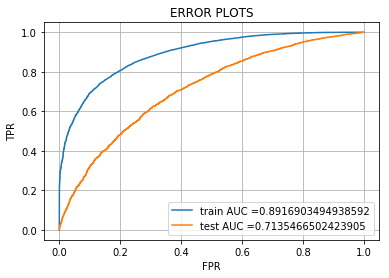

In [385]:
y_train_pred = predict_prob(best_clf, x_bow_train.tocsc()) 
y_test_pred = predict_prob(best_clf, x_bow_test.tocsc())

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR") 
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [386]:
pd.DataFrame(clf.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.256188      0.019524         0.085944        0.004997   
1        0.504044      0.024376         0.375577        0.012321   
2        0.820876      0.018354         0.690120        0.023997   
3        1.065941      0.020395         0.998574        0.027647   
4        1.346077      0.028666         1.299623        0.010856   
..            ...           ...              ...             ...   
67       3.820690      0.090729         1.006077        0.001780   
68       5.206429      0.157735         1.333050        0.004159   
69       7.646885      0.175646         1.990044        0.002762   
70      12.528271      0.387203         3.305565        0.004295   
71      25.099330      0.327989         6.645235        0.040706   

   param_max_depth param_n_estimators  \
0                2                 10   
1                2                 50   
2                2                100   
3                2                150   
4                2                200   
..             ...                ...   
67              10                150   
68              10                200   
69              10                300   
70              10                500   
71              10               1000   

                                     params  split0_test_score  \
0      {'max_depth': 2, 'n_estimators': 10}           0.594340   
1      {'max_depth': 2, 'n_estimators': 50}           0.674685   
2     {'max_depth': 2, 'n_estimators': 100}           0.682066   
3     {'max_depth': 2, 'n_estimators': 150}           0.697469   
4     {'max_depth': 2, 'n_estimators': 200}           0.694916   
..                                      ...                ...   
67   {'max_depth': 10, 'n_estimators': 150}           0.707791   
68   {'max_depth': 10, 'n_estimators': 200}           0.712587   
69   {'max_depth': 10, 'n_estimators': 300}           0.707450   
70   {'max_depth': 10, 'n_estimators': 500}           0.717527   
71  {'max_depth': 10, 'n_estimators': 1000}           0.719539   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.616458           0.594216         0.601671        0.010455   
1            0.657745           0.665438         0.665957        0.006926   
2            0.690309           0.666377         0.679584        0.009926   
3            0.691511           0.675568         0.688183        0.009246   
4            0.686559           0.685544         0.689007        0.004199   
..                ...                ...              ...             ...   
67           0.708390           0.694954         0.703712        0.006197   
68           0.710368           0.697389         0.706782        0.006703   
69           0.709142           0.698136         0.704909        0.004839   
70           0.716780           0.699481         0.711263        0.008336   
71           0.716572           0.702326         0.712813        0.007513   

    rank_test_score  
0                72  
1                63  
2                59  
3                54  
4                52  
..              ...  
67               23  
68               11  
69               18  
70                3  
71                1  

[72 rows x 13 columns]

In [387]:
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_), values = 'mean_test_score',index= 'param_n_estimators',columns ='param_max_depth')

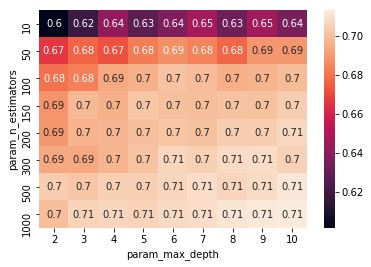

In [388]:
import seaborn as sns
ax = sns.heatmap(pvt, annot = True)

In [389]:
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
# (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould): 
    predictions = []
    for i in proba:
        if i>=threshould: 
            predictions.append(1)
        else: 
            predictions.append(0)
    return predictions

In [390]:
from sklearn.metrics import confusion_matrix

In [391]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.6472410258682417 for threshold 0.833


Train confusion matrix


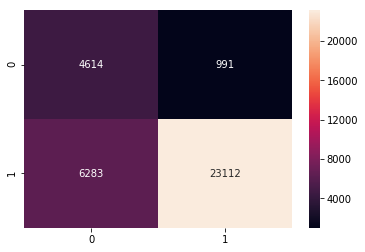

In [393]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


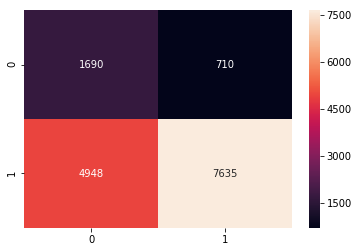

In [394]:
 print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [818]:
x_tfidf_train= hstack((teacher_rej_train,grades_rej_train,school_rej_train,cat_rej_train,subcat_rej_train,price_standardized_train,teacher_number_of_previously_posted_projects_standardized_train,quantity_train,essay_words_train,title_words_train,neg_train,pos_train, neu_train, compound_train,essay_tfidf_train,title_tfidf_train))
x_tfidf_train.shape

(35000, 6576)

In [819]:
x_tfidf_test= hstack((teacher_rej_test,grades_rej_test,school_rej_test,cat_rej_test,subcat_rej_test,price_standardized_test,teacher_number_of_previously_posted_projects_standardized_test,quantity_test,essay_words_test,title_words_test,neg_test,pos_test, neu_test, compound_test,essay_tfidf_test,title_tfidf_test))
x_tfidf_test.shape

(14983, 6576)

In [395]:
model = RandomForestClassifier()

In [396]:
clf = GridSearchCV(model,params, scoring = 'roc_auc')

In [397]:
result = clf.fit(x_tfidf_train,y_train)

In [398]:
best_clf = clf.best_estimator_

In [399]:
best_clf.fit(x_tfidf_train,y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

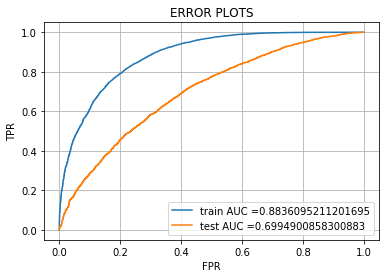

In [408]:
y_train_pred = predict_prob(best_clf, x_tfidf_train.tocsc()) 
y_test_pred = predict_prob(best_clf, x_tfidf_test.tocsc())

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR") 
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [409]:
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_), values = 'mean_test_score',index= 'param_n_estimators',columns ='param_max_depth')

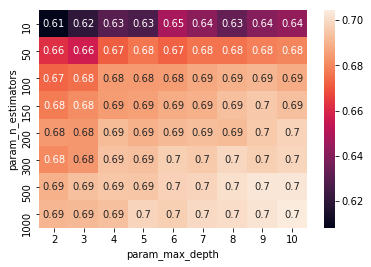

In [410]:
import seaborn as sns
ax = sns.heatmap(pvt, annot = True)

In [411]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.6361135349379298 for threshold 0.833


Train confusion matrix


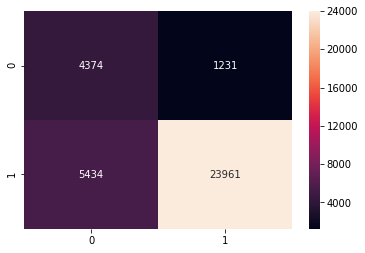

In [412]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


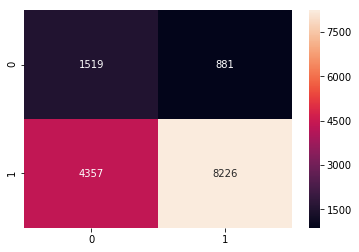

In [413]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [451]:
x_w2v_train= np.hstack((teacher_rej_train,grades_rej_train,school_rej_train,cat_rej_train,subcat_rej_train,price_standardized_train,teacher_number_of_previously_posted_projects_standardized_train,quantity_train,essay_words_train,title_words_train,neg_train,pos_train, neu_train, compound_train,avg_w2v_vectors_essay_train,avg_w2v_vectors_title_train))
print(x_w2v_train.shape)

##########taking only 20k points(due to memory issues. Dividing 20k points in 70-30 ratio i.e. 14k-6k datapoints)
x_w2v_train = x_w2v_train[:14000]
print(x_w2v_train.shape)
y_w2v_train= y_train[:14000]
print(y_w2v_train.shape)  

(35000, 614)
(14000, 614)
(14000,)


In [453]:
x_w2v_test= np.hstack((teacher_rej_test,grades_rej_test,school_rej_test,cat_rej_test,subcat_rej_test,price_standardized_test,teacher_number_of_previously_posted_projects_standardized_test,quantity_test,essay_words_test,title_words_test,neg_test,pos_test, neu_test, compound_test,avg_w2v_vectors_essay_test,avg_w2v_vectors_title_test))
print(x_w2v_test.shape)

x_w2v_test = x_w2v_test[:6000]
print(x_w2v_test.shape)
y_w2v_test= y_test[:6000]
print(y_w2v_test.shape)

(14983, 614)
(6000, 614)
(6000,)


In [454]:
model = RandomForestClassifier()

In [455]:
clf = GridSearchCV(model,params, scoring = 'roc_auc')

In [456]:
result = clf.fit(x_w2v_train,y_w2v_train) 

In [457]:
best_clf = clf.best_estimator_

In [458]:
best_clf.fit(x_w2v_train,y_w2v_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

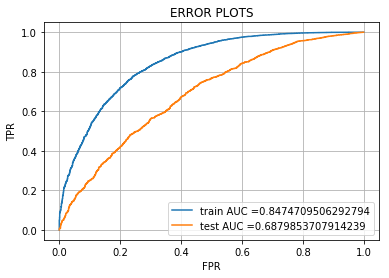

In [460]:
y_train_pred = predict_prob(best_clf, x_w2v_train) 
y_test_pred = predict_prob(best_clf, x_w2v_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_w2v_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_w2v_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR") 
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [461]:
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_), values = 'mean_test_score',index= 'param_n_estimators',columns ='param_max_depth')

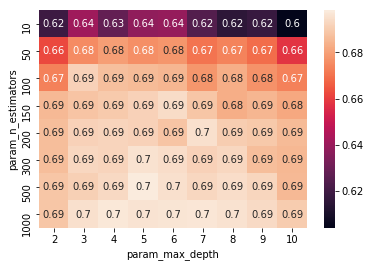

In [462]:
import seaborn as sns
ax = sns.heatmap(pvt, annot = True)

In [463]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.5895886393793857 for threshold 0.836


Train confusion matrix


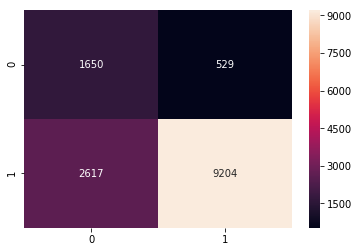

In [464]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y_w2v_train, predict_with_best_t(y_train_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


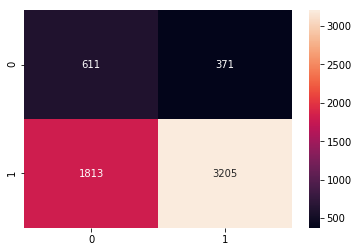

In [465]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y_w2v_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [481]:
x_tfidfw2v_train= np.hstack((teacher_rej_train,grades_rej_train,school_rej_train,cat_rej_train,subcat_rej_train,price_standardized_train,teacher_number_of_previously_posted_projects_standardized_train,quantity_train,essay_words_train,title_words_train,neg_train,pos_train, neu_train, compound_train,tfidf_w2v_vectors_essay_train,tfidf_w2v_vectors_title_train))
print(x_tfidfw2v_train.shape)

##########taking only 20k points(due to memory issues. Dividing 20k points in 70-30 ratio i.e. 14k-6k datapoints)
x_tfidfw2v_train = x_tfidfw2v_train[:14000]
print(x_tfidfw2v_train.shape)
y_w2v_train= y_train[:14000]
print(y_w2v_train.shape)

(35000, 614)
(14000, 614)
(14000,)


In [482]:
x_tfidfw2v_test= np.hstack((teacher_rej_test,grades_rej_test,school_rej_test,cat_rej_test,subcat_rej_test,price_standardized_test,teacher_number_of_previously_posted_projects_standardized_test,quantity_test,essay_words_test,title_words_test,neg_test,pos_test, neu_test, compound_test,tfidf_w2v_vectors_essay_test,tfidf_w2v_vectors_title_test))
print(x_tfidfw2v_test.shape)

x_tfidfw2v_test = x_tfidfw2v_test[:6000]
print(x_tfidfw2v_test.shape)
y_w2v_test= y_test[:6000]
print(y_w2v_test.shape)

(14983, 614)
(6000, 614)
(6000,)


In [483]:
model = RandomForestClassifier()

In [484]:
clf = GridSearchCV(model,params, scoring = 'roc_auc')

In [485]:
result = clf.fit(x_tfidfw2v_train,y_w2v_train)

In [487]:
best_clf = clf.best_estimator_

In [488]:
best_clf.fit(x_tfidfw2v_train,y_w2v_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

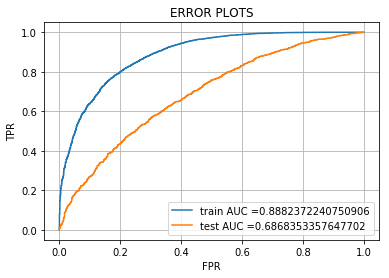

In [489]:
y_train_pred = predict_prob(best_clf, x_tfidfw2v_train) 
y_test_pred = predict_prob(best_clf, x_tfidfw2v_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_w2v_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_w2v_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR") 
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [490]:
pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_), values = 'mean_test_score',index= 'param_n_estimators',columns ='param_max_depth')

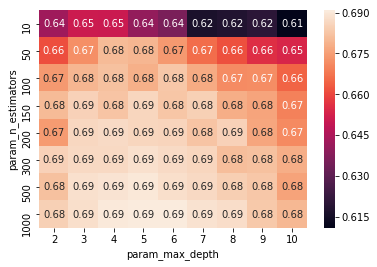

In [491]:
import seaborn as sns
ax = sns.heatmap(pvt, annot = True)

In [492]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.6408367992200003 for threshold 0.829


Train confusion matrix


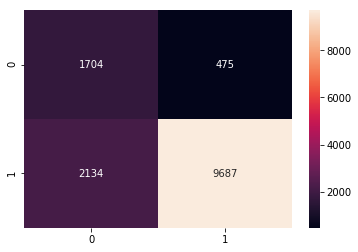

In [497]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y_w2v_train, predict_with_best_t(y_train_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


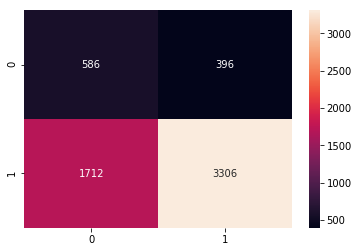

In [498]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y_w2v_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [791]:
import xgboost as xgb

In [792]:
print(x_bow_train.shape)
print(y_train.shape)

(35000, 6576)
(35000,)


In [793]:
#total 20k datapoints
#20k - 70:30 - 14000-6000 (train-test)
#diving 14000 70-30 - 9800-4200 (train-cv)

x_bow_train_ = x_bow_train.tocsc()[:9800]
y_train_ = y_train[:9800]

x_bow_cv_ = x_bow_train.tocsc()[9800:14000]
y_cv_ = y_train[9800:14000]

print(x_bow_train_.shape)
print(y_train_.shape)

print(x_bow_cv_.shape)
print(y_cv_.shape)

x_bow_test_ = x_bow_test.tocsc()[:6000]
y_test_  = y_test [:6000]
print(x_bow_test_.shape)
print(y_test_.shape)

(9800, 6576)
(9800,)
(4200, 6576)
(4200,)
(6000, 6576)
(6000,)


In [794]:
 def predict_prob(clf, data): 
        y_data_pred = []
        y_data_pred.extend(clf.predict_proba(data)[:,1]) 
        
        return y_data_pred

In [797]:
estimator = [5, 10, 50, 100, 200]
depth = [2, 3, 4, 5, 6, 7, 8]

final_train_auc = []
final_cv_auc = []

for i in tqdm(estimator):
    train_auc = []
    cv_auc = []
    for j in tqdm(depth):
        
        xgb_model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=i,max_depth= j, objective='binary:logistic', 
                    silent=True, nthread=1)
        
        xgb_model.fit(x_bow_train_, y_train_)
        
        y_train_pred = predict_prob(xgb_model, x_bow_train_.tocsc())    
        y_cv_pred = predict_prob(xgb_model, x_bow_cv_.tocsc()) 

        train_auc.append(roc_auc_score(y_train_,y_train_pred)) 
        cv_auc.append(roc_auc_score(y_cv_, y_cv_pred)) 
    final_train_auc.append(train_auc)   
    final_cv_auc.append(cv_auc)




  0%|          | 0/5 [00:00<?, ?it/s]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:01<00:11,  1.86s/it]



 29%|██▊       | 2/7 [00:03<00:09,  1.91s/it]



 43%|████▎     | 3/7 [00:06<00:08,  2.00s/it]



 57%|█████▋    | 4/7 [00:08<00:06,  2.14s/it]



 71%|███████▏  | 5/7 [00:11<00:04,  2.31s/it]



 86%|████████▌ | 6/7 [00:14<00:02,  2.50s/it]



100%|██████████| 7/7 [00:17<00:00,  2.70s/it]






 20%|██        | 1/5 [00:17<01:09, 17.39s/it]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:02<00:14,  2.38s/it]



 29%|██▊       | 2/7 [00:05<00:12,  2.50s/it]



 43%|████▎     | 3/7 [00:08<00:10,  2.73s/it]



 57%|█████▋    | 4/7 [00:12<00:09,  3.01s/it]



 71%|███████▏  | 5/7 [00:16<00:06,  3.35s/it]



 86%|████████▌ | 6/7 [00:20<00:03,  3.72s/it]



100%|██████████| 7/7 [00:26<00:00,  4.21s/it]






 40%|████      | 2/5 [00:43<01:00, 20.02s/it]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:06<00:41,  6.98s/i

Text(0.5, 1.0, 'Train data')

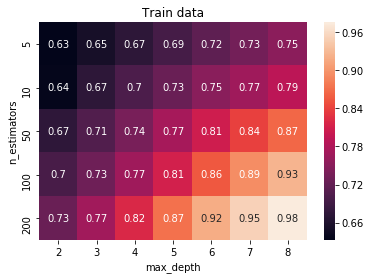

In [799]:
a = pd.DataFrame(final_train_auc, columns = [2, 3, 4, 5, 6, 7, 8], index =[5, 10, 50, 100, 200])
ax= sns.heatmap(a, annot = True)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("Train data")

Text(0.5, 1.0, 'CV data')

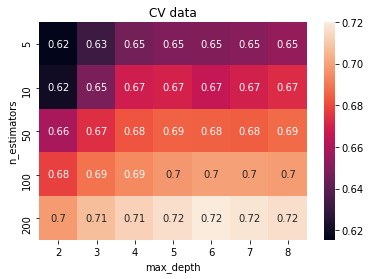

In [800]:
a = pd.DataFrame(final_cv_auc, columns = [2, 3, 4, 5, 6, 7, 8], index =[5, 10, 50, 100, 200])
ax= sns.heatmap(a, annot = True)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("CV data")

In [ ]:
#choosing n_estimators = 200 and max_depth = 8

In [801]:
best_params = {'n_estimators':200,
               'max_depth' : 8} 

In [805]:
d_train = xgb.DMatrix(x_bow_train_, label = y_train_) 
d_test = xgb.DMatrix(x_bow_test_, label = y_test_) 

In [806]:
watchlist = [(d_train, 'train'), (d_test, 'valid')] 

In [807]:
bst = xgb.train(best_params, d_train, 200, watchlist, early_stopping_rounds=10, verbose_eval=10) 

[0]	train-rmse:0.424845	valid-rmse:0.438001
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[10]	train-rmse:0.284377	valid-rmse:0.374339
Stopping. Best iteration:
[6]	train-rmse:0.302534	valid-rmse:0.367989



In [815]:
y_train_pred = bst.predict(d_train)
y_test_pred  = bst.predict(d_test)

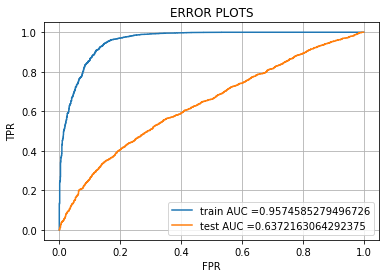

In [812]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR") 
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [813]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.8038518623894539 for threshold 0.765


Train confusion matrix


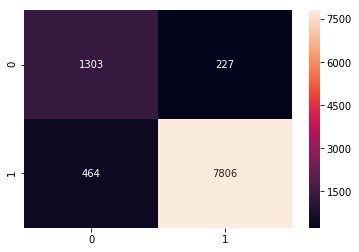

In [814]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y_train_, predict_with_best_t(y_train_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


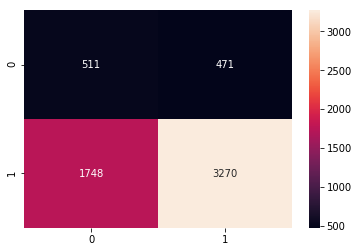

In [816]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y_test_, predict_with_best_t(y_test_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [820]:
x_tfidf_train.shape

(35000, 6576)

In [863]:
#total 20k datapoints
#20k - 70:30 - 14000-6000 (train-test)
#diving 14000 70-30 - 9800-4200 (train-cv)

x_tfidf_train_ = x_tfidf_train.tocsc()[:9800]
y_train_ = y_train[:9800]

x_tfidf_cv_ = x_tfidf_train.tocsc()[9800:14000]
y_cv_ = y_train[9800:14000]

print(x_tfidf_train_.shape)
print(y_train_.shape)

print(x_tfidf_cv_.shape)
print(y_cv_.shape)

x_tfidf_test_ = x_tfidf_test.tocsc()[:6000]
y_test_  = y_test [:6000]
print(x_tfidf_test_.shape)
print(y_test_.shape)

(9800, 6576)
(9800,)
(4200, 6576)
(4200,)
(6000, 6576)
(6000,)


In [822]:
estimator = [5, 10, 50, 100, 200]
depth = [2, 3, 4, 5, 6, 7, 8]

final_train_auc = []
final_cv_auc = []

for i in tqdm(estimator):
    train_auc = []
    cv_auc = []
    for j in tqdm(depth):
        
        xgb_model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=i,max_depth= j, objective='binary:logistic', 
                    silent=True, nthread=1)
        
        xgb_model.fit(x_tfidf_train_, y_train_)
        
        y_train_pred = predict_prob(xgb_model, x_tfidf_train_.tocsc())    
        y_cv_pred = predict_prob(xgb_model, x_tfidf_cv_.tocsc()) 

        train_auc.append(roc_auc_score(y_train_,y_train_pred)) 
        cv_auc.append(roc_auc_score(y_cv_, y_cv_pred)) 
    final_train_auc.append(train_auc)   
    final_cv_auc.append(cv_auc) 
    




  0%|          | 0/5 [00:00<?, ?it/s]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:02<00:12,  2.15s/it]



 29%|██▊       | 2/7 [00:04<00:11,  2.23s/it]



 43%|████▎     | 3/7 [00:07<00:09,  2.43s/it]



 57%|█████▋    | 4/7 [00:10<00:08,  2.73s/it]



 71%|███████▏  | 5/7 [00:14<00:06,  3.03s/it]



 86%|████████▌ | 6/7 [00:18<00:03,  3.33s/it]



100%|██████████| 7/7 [00:23<00:00,  3.77s/it]






 20%|██        | 1/5 [00:23<01:33, 23.47s/it]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:03<00:18,  3.15s/it]



 29%|██▊       | 2/7 [00:06<00:16,  3.34s/it]



 43%|████▎     | 3/7 [00:11<00:14,  3.66s/it]



 57%|█████▋    | 4/7 [00:16<00:12,  4.11s/it]



 71%|███████▏  | 5/7 [00:22<00:09,  4.65s/it]



 86%|████████▌ | 6/7 [00:29<00:05,  5.33s/it]



100%|██████████| 7/7 [00:37<00:00,  6.19s/it]






 40%|████      | 2/5 [01:00<01:23, 27.68s/it]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:09<00:58,  9.76s/i

Text(0.5, 1.0, 'Train data')

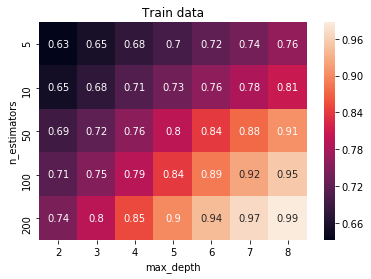

In [823]:
a = pd.DataFrame(final_train_auc, columns = [2, 3, 4, 5, 6, 7, 8], index =[5, 10, 50, 100, 200])
ax= sns.heatmap(a, annot = True)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("Train data")

Text(0.5, 1.0, 'CV data')

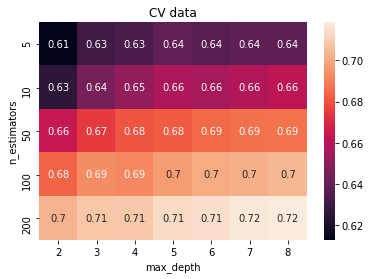

In [824]:
a = pd.DataFrame(final_cv_auc, columns = [2, 3, 4, 5, 6, 7, 8], index =[5, 10, 50, 100, 200])
ax= sns.heatmap(a, annot = True)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("CV data")

In [825]:
best_params = {'n_estimators':200,
               'max_depth' : 8}

In [826]:
d_train = xgb.DMatrix(x_tfidf_train_, label = y_train_) 
d_test = xgb.DMatrix(x_tfidf_test_, label = y_test_) 

In [827]:
watchlist = [(d_train, 'train'), (d_test, 'valid')] 

In [828]:
bst = xgb.train(best_params, d_train, 200, watchlist, early_stopping_rounds=10, verbose_eval=10) 

[0]	train-rmse:0.420478	valid-rmse:0.440507
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[10]	train-rmse:0.274127	valid-rmse:0.381197
Stopping. Best iteration:
[4]	train-rmse:0.310863	valid-rmse:0.370831



In [829]:
y_train_pred = bst.predict(d_train)
y_test_pred  = bst.predict(d_test)

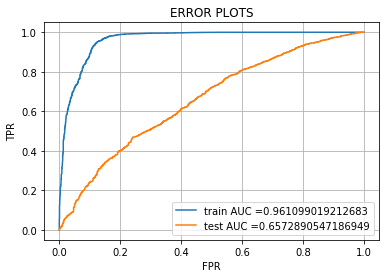

In [830]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR") 
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [831]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.832516379385289 for threshold 0.792


Train confusion matrix


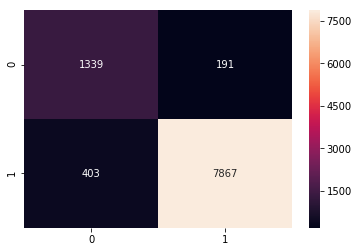

In [832]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y_train_, predict_with_best_t(y_train_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


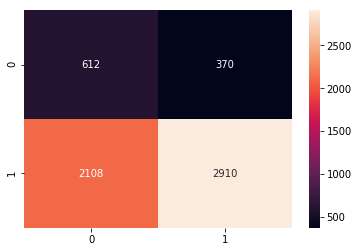

In [833]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y_test_, predict_with_best_t(y_test_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [864]:
#total 20k datapoints
#x_w2v_train 
#y_w2v_train

x_w2v_train_ = x_w2v_train[:9800]
y_train_ = y_train[:9800]

x_w2v_cv_ = x_w2v_train[9800:14000]
y_cv_ = y_train[9800:14000]

print(x_w2v_train_.shape)
print(y_train_.shape)

print(x_w2v_cv_.shape)
print(y_cv_.shape)

x_w2v_test_ = x_w2v_test[:6000]
y_test_  = y_test [:6000]
print(x_w2v_test_.shape)
print(y_test_.shape)

(9800, 614)
(9800,)
(4200, 614)
(4200,)
(6000, 614)
(6000,)


In [842]:
estimator = [5, 10, 50, 100, 200]
depth = [2, 3, 4, 5, 6, 7, 8]

final_train_auc = []
final_cv_auc = []

for i in tqdm(estimator):
    train_auc = []
    cv_auc = []
    for j in tqdm(depth):
        
        xgb_model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=i,max_depth= j, objective='binary:logistic', 
                    silent=True, nthread=1)
        
        xgb_model.fit(x_w2v_train_, y_train_)
        
        y_train_pred = predict_prob(xgb_model, x_w2v_train_)    
        y_cv_pred = predict_prob(xgb_model, x_w2v_cv_) 

        train_auc.append(roc_auc_score(y_train_,y_train_pred)) 
        cv_auc.append(roc_auc_score(y_cv_, y_cv_pred)) 
    final_train_auc.append(train_auc)   
    final_cv_auc.append(cv_auc)
    




  0%|          | 0/5 [00:00<?, ?it/s]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:02<00:17,  2.97s/it]



 29%|██▊       | 2/7 [00:06<00:15,  3.14s/it]



 43%|████▎     | 3/7 [00:10<00:13,  3.45s/it]



 57%|█████▋    | 4/7 [00:15<00:11,  3.86s/it]



 71%|███████▏  | 5/7 [00:20<00:08,  4.31s/it]



 86%|████████▌ | 6/7 [00:26<00:04,  4.82s/it]



100%|██████████| 7/7 [00:33<00:00,  5.37s/it]






 20%|██        | 1/5 [00:33<02:14, 33.52s/it]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:04<00:27,  4.63s/it]



 29%|██▊       | 2/7 [00:10<00:25,  5.03s/it]



 43%|████▎     | 3/7 [00:17<00:22,  5.72s/it]



 57%|█████▋    | 4/7 [00:26<00:19,  6.52s/it]



 71%|███████▏  | 5/7 [00:35<00:14,  7.44s/it]



 86%|████████▌ | 6/7 [00:46<00:08,  8.48s/it]



100%|██████████| 7/7 [00:59<00:00,  9.73s/it]






 40%|████      | 2/5 [01:32<02:03, 41.30s/it]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:18<01:53, 18.92s/i

Text(0.5, 1.0, 'Train data')

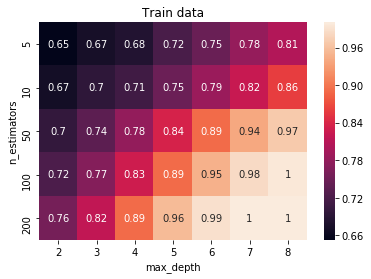

In [852]:
a = pd.DataFrame(final_train_auc, columns = [2, 3, 4, 5, 6, 7, 8], index =[5, 10, 50, 100, 200])
ax= sns.heatmap(a, annot = True)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("Train data")

Text(0.5, 1.0, 'CV data')

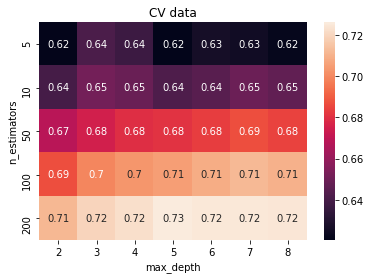

In [853]:
a = pd.DataFrame(final_cv_auc, columns = [2, 3, 4, 5, 6, 7, 8], index =[5, 10, 50, 100, 200])
ax= sns.heatmap(a, annot = True)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("CV data")

In [871]:
best_params = {'n_estimators':200,
               'max_depth' : 5} 

In [872]:
d_train = xgb.DMatrix(x_w2v_train_, label = y_train_) 
d_test = xgb.DMatrix(x_w2v_test_, label = y_test_) 

In [873]:
watchlist = [(d_train, 'train'), (d_test, 'valid')] 

In [874]:
bst = xgb.train(best_params, d_train, 200, watchlist, early_stopping_rounds=10, verbose_eval=10) 

[0]	train-rmse:0.427944	valid-rmse:0.438375
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[10]	train-rmse:0.304742	valid-rmse:0.360867
Stopping. Best iteration:
[9]	train-rmse:0.309276	valid-rmse:0.360601



In [875]:
y_train_pred = bst.predict(d_train)
y_test_pred  = bst.predict(d_test)

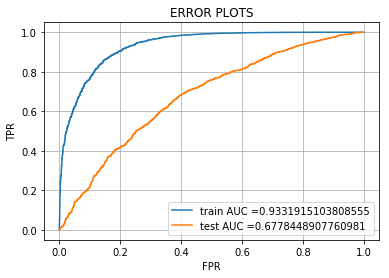

In [876]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR") 
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [879]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.7333589397064751 for threshold 0.803


Train confusion matrix


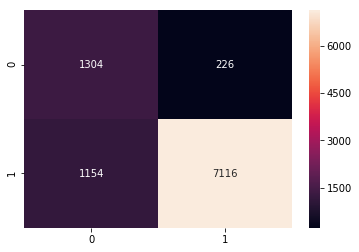

In [880]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y_train_, predict_with_best_t(y_train_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


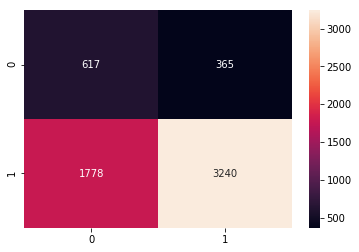

In [881]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y_test_, predict_with_best_t(y_test_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [882]:
#total 20k datapoints
#20k - 70:30 - 14000-6000 (train-test)
#diving 14000 70-30 - 9800-4200 (train-cv)

x_tfidfw2v_train_ = x_tfidfw2v_train[:9800]
y_train_ = y_train[:9800]

x_tfidfw2v_cv_ = x_tfidfw2v_train[9800:14000]
y_cv_ = y_train[9800:14000]

print(x_tfidfw2v_train_.shape)
print(x_tfidfw2v_cv_.shape)

print(x_tfidfw2v_cv_.shape)
print(y_cv_.shape)

x_tfidfw2v_test_ = x_tfidfw2v_test[:6000]
y_test_  = y_test [:6000]
print(x_tfidfw2v_test_.shape)
print(y_test_.shape)

(9800, 614)
(4200, 614)
(4200, 614)
(4200,)
(6000, 614)
(6000,)


In [884]:
estimator = [5, 10, 50, 100, 200]
depth = [2, 3, 4, 5, 6, 7, 8]

final_train_auc = []
final_cv_auc = []

for i in tqdm(estimator):
    train_auc = []
    cv_auc = []
    for j in tqdm(depth):
        
        xgb_model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=i,max_depth= j, objective='binary:logistic', 
                    silent=True, nthread=1)
        
        xgb_model.fit(x_tfidfw2v_train_, y_train_)
        
        y_train_pred = predict_prob(xgb_model, x_tfidfw2v_train_)    
        y_cv_pred = predict_prob(xgb_model, x_tfidfw2v_cv_) 

        train_auc.append(roc_auc_score(y_train_,y_train_pred)) 
        cv_auc.append(roc_auc_score(y_cv_, y_cv_pred)) 
    final_train_auc.append(train_auc)   
    final_cv_auc.append(cv_auc)




  0%|          | 0/5 [00:00<?, ?it/s]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:03<00:22,  3.72s/it]



 29%|██▊       | 2/7 [00:07<00:18,  3.71s/it]



 43%|████▎     | 3/7 [00:11<00:15,  3.86s/it]



 57%|█████▋    | 4/7 [00:16<00:12,  4.18s/it]



 71%|███████▏  | 5/7 [00:22<00:09,  4.71s/it]



 86%|████████▌ | 6/7 [00:28<00:05,  5.17s/it]



100%|██████████| 7/7 [00:35<00:00,  5.72s/it]






 20%|██        | 1/5 [00:35<02:22, 35.75s/it]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:04<00:29,  4.89s/it]



 29%|██▊       | 2/7 [00:10<00:26,  5.22s/it]



 43%|████▎     | 3/7 [00:18<00:23,  5.99s/it]



 57%|█████▋    | 4/7 [00:27<00:20,  6.75s/it]



 71%|███████▏  | 5/7 [00:36<00:15,  7.67s/it]



 86%|████████▌ | 6/7 [00:48<00:08,  8.78s/it]



100%|██████████| 7/7 [01:01<00:00, 10.00s/it]






 40%|████      | 2/5 [01:37<02:10, 43.43s/it]



  0%|          | 0/7 [00:00<?, ?it/s]



 14%|█▍        | 1/7 [00:19<01:59, 19.85s/i

Text(0.5, 1.0, 'Train data')

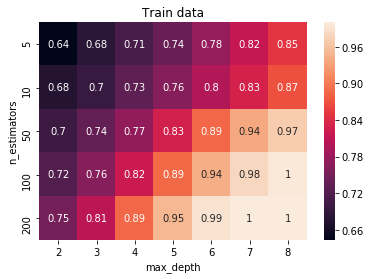

In [886]:
a = pd.DataFrame(final_train_auc, columns = [2, 3, 4, 5, 6, 7, 8], index =[5, 10, 50, 100, 200])
ax= sns.heatmap(a, annot = True)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("Train data")

Text(0.5, 1.0, 'CV data')

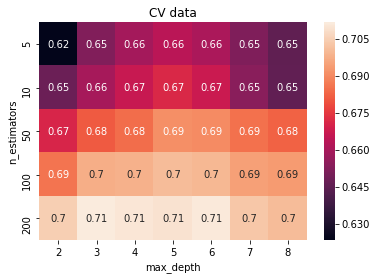

In [887]:
a = pd.DataFrame(final_cv_auc, columns = [2, 3, 4, 5, 6, 7, 8], index =[5, 10, 50, 100, 200])
ax= sns.heatmap(a, annot = True)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("CV data")

In [894]:
best_params = {'n_estimators':200,
               'max_depth' : 3}

In [895]:
d_train = xgb.DMatrix(x_tfidfw2v_train_, label = y_train_) 
d_test = xgb.DMatrix(x_tfidfw2v_test_, label = y_test_) 

In [896]:
watchlist = [(d_train, 'train'), (d_test, 'valid')] 

In [897]:
bst = xgb.train(best_params, d_train, 200, watchlist, early_stopping_rounds=10, verbose_eval=10) 

[0]	train-rmse:0.432212	valid-rmse:0.438672
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[10]	train-rmse:0.338726	valid-rmse:0.358753
[20]	train-rmse:0.326665	valid-rmse:0.35769
Stopping. Best iteration:
[15]	train-rmse:0.332315	valid-rmse:0.35752



In [898]:
y_train_pred = bst.predict(d_train)
y_test_pred  = bst.predict(d_test)

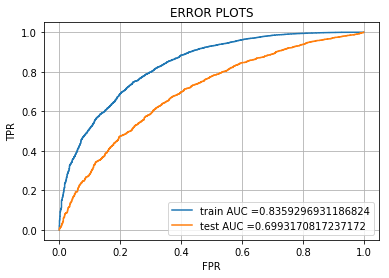

In [899]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr))) 
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR") 
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [900]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.5670231010582386 for threshold 0.818


Train confusion matrix


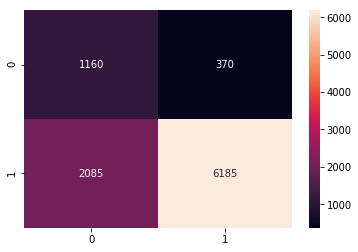

In [901]:
print("Train confusion matrix")
conf_matrix_train = confusion_matrix(y_train_, predict_with_best_t(y_train_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_train,fmt = 'd', annot=True)

Test confusion matrix


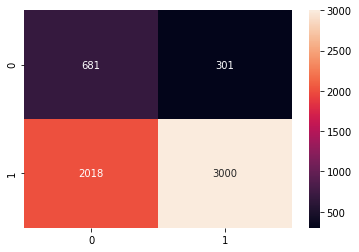

In [902]:
print("Test confusion matrix")
conf_matrix_test = confusion_matrix(y_test_, predict_with_best_t(y_test_pred, best_t)) #plotting confusion matrix using seaborn
sns.heatmap(conf_matrix_test,fmt = 'd', annot=True)

<h1>3. Conclusion</h1>

In [903]:
from prettytable import PrettyTable

In [904]:
x = PrettyTable()
x.field_names = ["model","set","total datapoints considered","test_auc"]

In [905]:
x.add_row(["RF","Bow","50k",0.714])
x.add_row(["RF","Tfidf","50k",0.699])
x.add_row(["RF","w2v","50k",0.688])
x.add_row(["RF","tfidfw2v","50k",0.687])
x.add_row(["XGBoost","Bow","20k",0.637])
x.add_row(["XGBoost","Tfidf","20k",0.657])
x.add_row(["XGBoost","w2v","20k",0.678])
x.add_row(["XGBoost","tfidfw2v","20k",0.699])

In [906]:
print(x)

+---------+----------+-----------------------------+----------+
|  model  |   set    | total datapoints considered | test_auc |
+---------+----------+-----------------------------+----------+
|    RF   |   Bow    |             50k             |  0.714   |
|    RF   |  Tfidf   |             50k             |  0.699   |
|    RF   |   w2v    |             50k             |  0.688   |
|    RF   | tfidfw2v |             50k             |  0.687   |
| XGBoost |   Bow    |             20k             |  0.637   |
| XGBoost |  Tfidf   |             20k             |  0.657   |
| XGBoost |   w2v    |             20k             |  0.678   |
| XGBoost | tfidfw2v |             20k             |  0.699   |
+---------+----------+-----------------------------+----------+
